In [11]:
import pandas as pd
df = pd.read_csv('/content/Dataset .csv')
df.columns.tolist()  # loading and displaying the dataset

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes']

In [12]:
df = df[['City', 'Cuisines', 'Price range', 'Aggregate rating', 'Votes']]
df.dropna(inplace=True) # dropping the missing values

<ipython-input-12-ef7a7d1ea6ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True) # dropping the missing values


In [13]:
from sklearn.preprocessing import LabelEncoder # encoding the categorical columns

le_city = LabelEncoder()
df['City'] = le_city.fit_transform(df['City'])

df['Cuisines'] = df['Cuisines'].apply(lambda x: x.split(',')[0].strip())

le_cuisine = LabelEncoder()
df['Cuisines'] = le_cuisine.fit_transform(df['Cuisines'])

In [14]:
from sklearn.model_selection import train_test_split # splitting the dataset for train and test

X = df[['City', 'Price range', 'Aggregate rating', 'Votes']]
y = df['Cuisines']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.ensemble import RandomForestClassifier #training the classification model

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
from sklearn.metrics import classification_report  # evaluating the model
import numpy as np

y_pred = model.predict(X_test)

labels_in_test = np.unique(np.concatenate([y_test, y_pred]))

print(classification_report(
    y_test, y_pred,
    labels=labels_in_test,
    target_names=le_cuisine.inverse_transform(labels_in_test)
))


                 precision    recall  f1-score   support

        Afghani       0.00      0.00      0.00         1
        African       0.00      0.00      0.00         0
       American       0.06      0.05      0.06        55
         Andhra       0.00      0.00      0.00         1
        Arabian       0.00      0.00      0.00         0
          Asian       0.00      0.00      0.00        17
   Asian Fusion       0.00      0.00      0.00         1
            BBQ       0.00      0.00      0.00         5
         Bakery       0.12      0.10      0.11       109
       Bar Food       0.00      0.00      0.00         6
        Bengali       0.00      0.00      0.00         4
      Beverages       0.00      0.00      0.00        13
         Bihari       0.00      0.00      0.00         0
        Biryani       0.12      0.05      0.07        22
      Brazilian       0.25      0.25      0.25         4
      Breakfast       0.00      0.00      0.00         3
        British       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

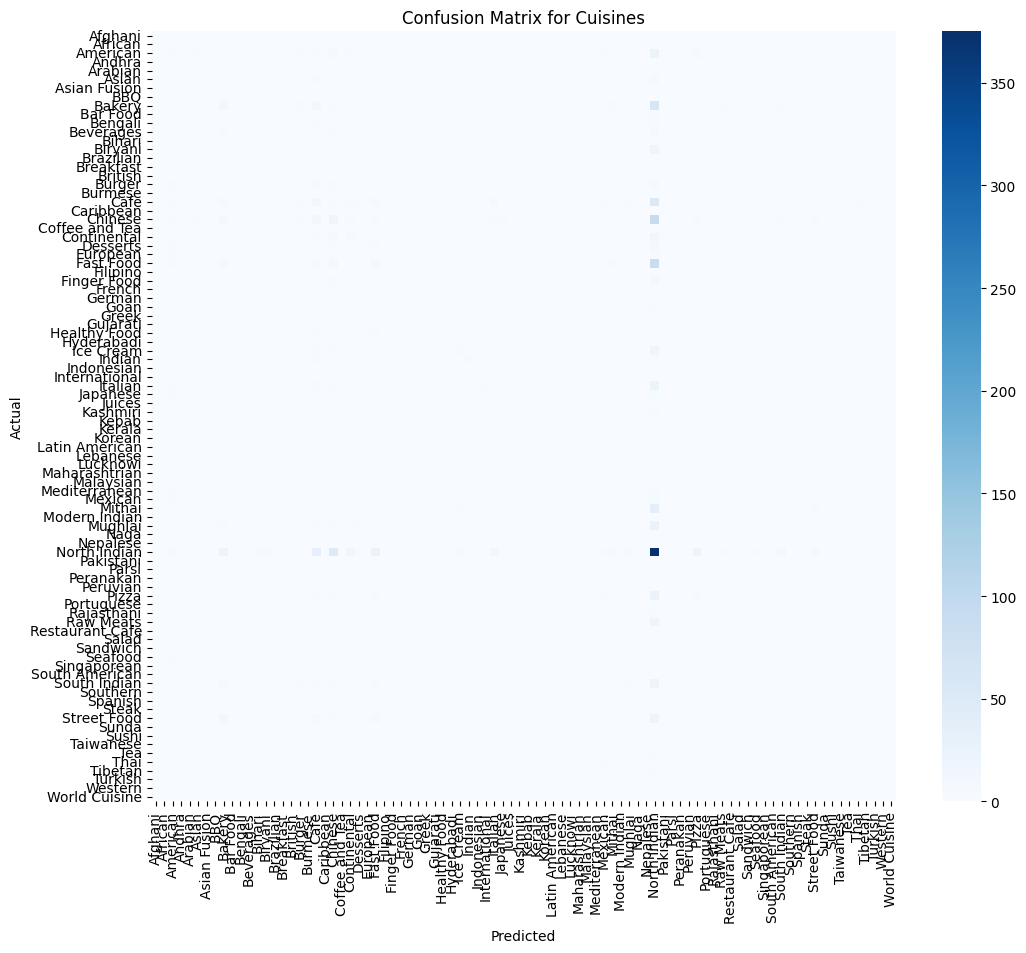

In [17]:
import matplotlib.pyplot as plt  # analysing the performance
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, labels=labels_in_test)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, xticklabels=le_cuisine.inverse_transform(labels_in_test),
            yticklabels=le_cuisine.inverse_transform(labels_in_test),
            annot=False, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Cuisines')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
